## **SEGMENTATION**

Link for the Image used: https://drive.google.com/file/d/1mmEI4Bi-4CYc5OynOf54wT2mRsI5wTaw/view?usp=sharing

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")

image_path = '/content/imgg.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [ ]:
lower_threshold_yellow = np.array([20, 100, 100])
upper_threshold_yellow = np.array([30, 255, 255])

lower_threshold_green = np.array([35, 100, 100])
upper_threshold_green = np.array([90, 255, 255])

In [ ]:
mask_yellow = cv2.inRange(image_hsv, lower_threshold_yellow, upper_threshold_yellow)
mask_green = cv2.inRange(image_hsv, lower_threshold_green, upper_threshold_green)

In [ ]:
kernel = np.ones((5, 5), np.uint8)
mask_yellow_cleaned = cv2.morphologyEx(mask_yellow, cv2.MORPH_CLOSE, kernel)
mask_yellow_cleaned = cv2.morphologyEx(mask_yellow_cleaned, cv2.MORPH_OPEN, kernel)

mask_green_cleaned = cv2.morphologyEx(mask_green, cv2.MORPH_CLOSE, kernel)
mask_green_cleaned = cv2.morphologyEx(mask_green_cleaned, cv2.MORPH_OPEN, kernel)

In [ ]:
def count_components(mask):
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)
    num_objects = num_labels - 1
    return num_objects

In [ ]:
num_ripe_bananas = count_components(mask_yellow_cleaned)
num_unripe_bananas = count_components(mask_green_cleaned)

print(f"Number of ripe bananas: {num_ripe_bananas}")
print(f"Number of unripe bananas: {num_unripe_bananas}")

Number of ripe bananas: 4
Number of unripe bananas: 8


In [ ]:
def overlay_counts(image, mask, color, label):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        if cv2.contourArea(contour) > 500:
            (x, y, w, h) = cv2.boundingRect(contour)
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    return image

In [ ]:
image_with_counts = image_rgb.copy()
image_with_counts = overlay_counts(image_with_counts, mask_yellow_cleaned, (255, 0, 0), "Ripe")
image_with_counts = overlay_counts(image_with_counts, mask_green_cleaned, (0, 255, 0), "Unripe")

In [ ]:
ret_yellow, binary_mask_yellow = cv2.threshold(mask_yellow, 127, 255, cv2.THRESH_BINARY)
ret_green, binary_mask_green = cv2.threshold(mask_green, 127, 255, cv2.THRESH_BINARY)

In [ ]:
segmented_yellow_fruits = cv2.bitwise_and(image_rgb, image_rgb, mask=binary_mask_yellow)

segmented_green_fruits = cv2.bitwise_and(image_rgb, image_rgb, mask=binary_mask_green)

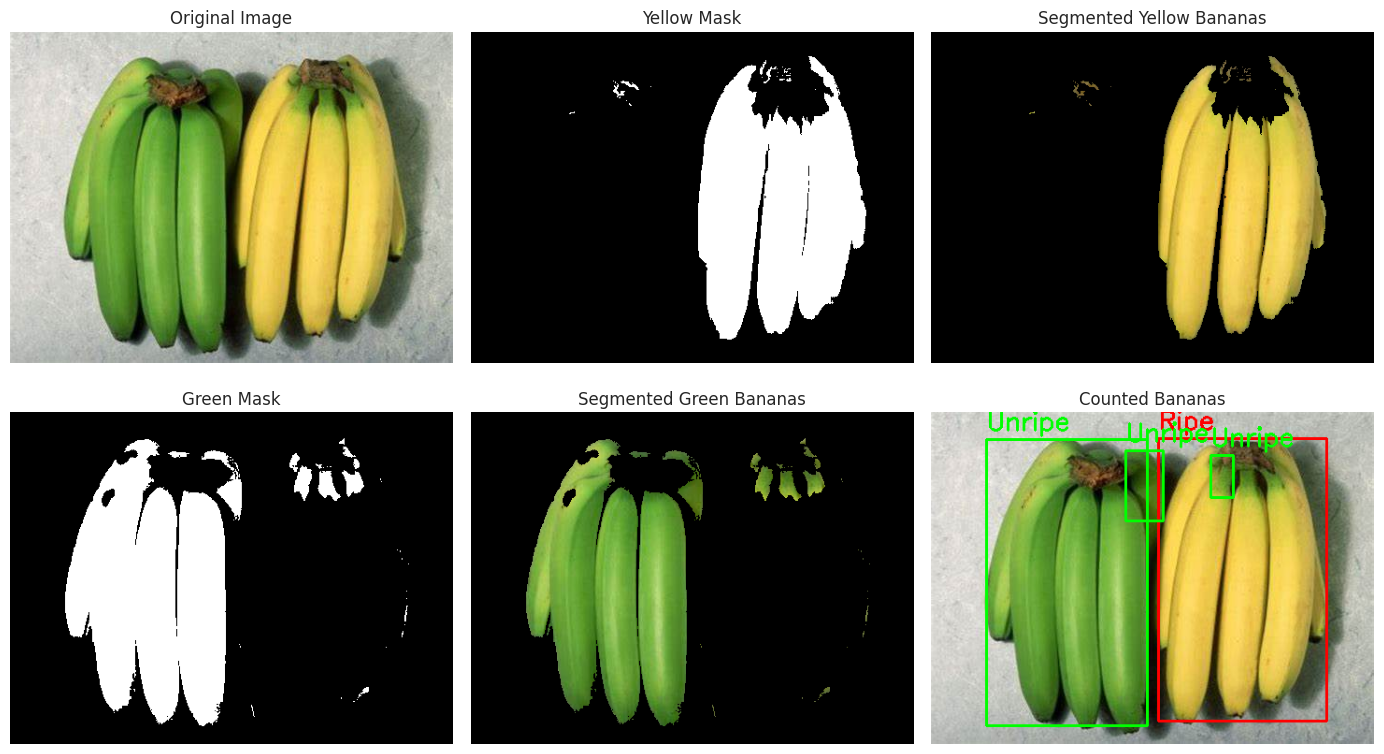

In [ ]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Yellow Mask')
plt.imshow(mask_yellow, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Segmented Yellow Bananas')
plt.imshow(segmented_yellow_fruits)
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Green Mask')
plt.imshow(mask_green, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Segmented Green Bananas')
plt.imshow(segmented_green_fruits)
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Counted Bananas')
plt.imshow(image_with_counts)
plt.axis('off')

plt.tight_layout()
plt.show()